# Experimentación

En este notebook correremos los experimentos que aparecen en el informe.

In [7]:
# Importamos las librerias para plotear la información
import numpy as np
from matplotlib import pyplot as plt

## Experimento 2

En este experimento, corremos cada RT con una misma escena, pero con archivos de salida con distintas resoluciones y comparamos los tiempos de ejecución. Para esto, generamos una escena aleatoria usando el script `./script/generate_scenes.py`, y lo copiamos cambiando la resolución.
Luego, corremos el RT por cada escena y medimos el tiempo que tomo generarla.

```sh
for scene in scenes/exp2_res_diff/*; do
    ./ray_tracer -a -s "$scene" -m 1 -n 5 2>/dev/null
done > exp2-asm_measurements.txt
```

Usamos `-c` en vez de `-a` para obtener los tiempos en C, y los guardamos en otro archivo.

In [36]:
sizes = [32, 64, 100, 200, 300, 350, 400, 450, 500, 600]
resolutions = [f"{s}x{s}" for s in sizes]
pixels=[s * s for s in sizes]
c_measurements = np.loadtxt('../exp2-c_measurements.txt')
asm_measurements = np.loadtxt('../exp2-asm_measurements.txt')

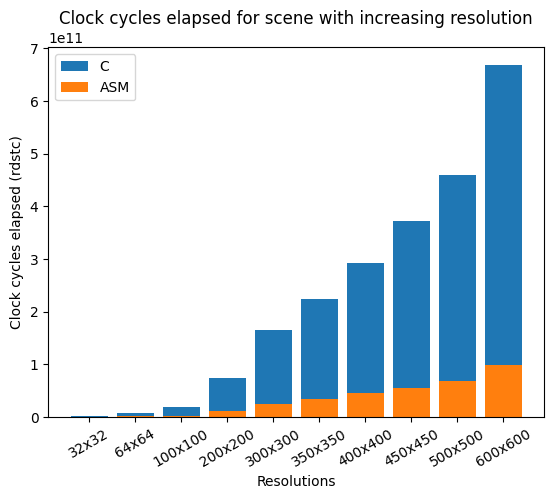

In [40]:
fig, ax = plt.subplots()
ax.bar(resolutions, c_measurements, label='C')
ax.bar(resolutions, asm_measurements, label='ASM')
ax.set_title('Clock cycles elapsed for scene with increasing resolution')
ax.set_ylabel('Clock cycles elapsed (rdstc)')
ax.set_xlabel('Resolutions')
ax.tick_params(axis='x', labelrotation=30)
ax.legend()
plt.savefig('imgs/exp2-res-bar.png')

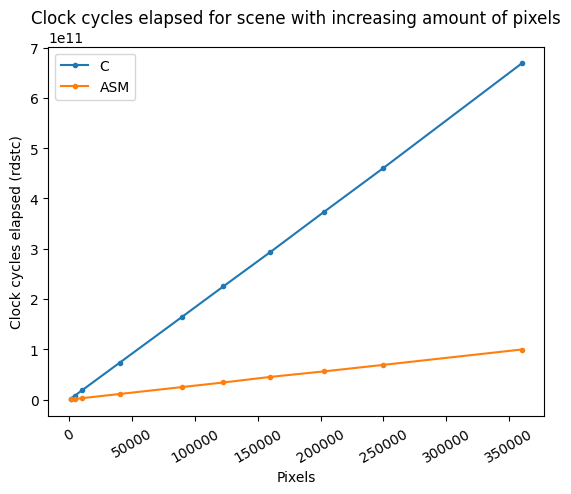

In [41]:
fig, ax = plt.subplots()
ax.plot(pixels, c_measurements, marker='.', label='C')
ax.plot(pixels, asm_measurements, marker='.', label='ASM')
ax.set_title('Clock cycles elapsed for scene with increasing amount of pixels')
ax.set_ylabel('Clock cycles elapsed (rdstc)')
ax.set_xlabel('Pixels')
ax.tick_params(axis='x', labelrotation=30)
ax.legend()
plt.savefig('imgs/exp2-res-line.png')